# SMA Percent Band

    1. The SPY closes above its upper band, buy
    2. If the SPY closes below its lower band, sell your long position.
    
    (optimize band)

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [20]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [21]:
symbol = '^GSPC'
#symbol = 'SPY'
#symbol = 'DIA'
#symbol = 'QQQ'
#symbol = 'IWM'
#symbol = 'TLT'
#symbol = 'GLD'
#symbol = 'AAPL'
#symbol = 'BBRY'
#symbol = 'GDX'
capital = 10000
start = datetime.datetime(1900, 1, 1)
start = datetime.datetime.strptime(pf.SP500_BEGIN, '%Y-%m-%d')
end = datetime.datetime.now()

Define percent bands (from 0 to 10% increment by 0.5)

In [22]:
bands = range(0, 100, 5)
bands = [str(band) for band in bands]

Run Strategy

In [23]:
strategies = pd.Series(dtype=object)
for band in bands:
    print("{0}".format(band), end=" ")
    strategies[band] = strategy.Strategy(symbol, capital, start, end, sma_period=200, percent_band=int(band)/10)
    strategies[band].run()
    _, strategies[band].tlog, strategies[band].dbal = strategies[band].get_logs()
    strategies[band].stats = strategies[band].get_stats()

0 5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95 

Summarize results

In [24]:
metrics = ('annual_return_rate',
           'ending_balance',
           'max_closed_out_drawdown',
           'drawdown_annualized_return',
           'drawdown_recovery',
           'best_month',
           'worst_month',
           'sharpe_ratio',
           'sortino_ratio',
           'monthly_std',
           'pct_time_in_market',
           'total_num_trades',
           'pct_profitable_trades',
           'trades_per_year',
           'avg_points')

df = strategy.summary(strategies, metrics)
df

,0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95
annual_return_rate,6.64,6.63,6.67,6.62,6.49,6.75,6.94,6.92,6.55,6.71,6.65,6.11,5.71,5.58,5.10,5.11,4.98,5.29,5.55,5.23
ending_balance,592012.09,588367.25,603238.98,584955.10,541206.76,632561.03,706877.79,700368.10,562273.24,616482.50,596622.30,432731.87,340411.93,314069.54,235093.43,236891.77,219313.93,264620.31,308730.09,247531.75
max_closed_out_drawdown,-28.23,-24.13,-22.18,-22.42,-21.53,-25.37,-25.07,-21.98,-23.71,-23.74,-23.68,-36.83,-37.04,-37.64,-37.62,-34.21,-34.24,-34.73,-34.99,-35.52
drawdown_annualized_return,-4.25,-3.64,-3.33,-3.39,-3.32,-3.76,-3.62,-3.18,-3.62,-3.54,-3.56,-6.03,-6.48,-6.75,-7.38,-6.69,-6.87,-6.56,-6.31,-6.79
drawdown_recovery,-3.76,-1.98,-1.98,-3.76,-3.69,-3.69,-2.64,-0.31,-0.31,-0.31,-0.31,-0.99,-0.99,-1.23,-1.23,-1.52,-1.52,-1.52,-1.52,-1.52
best_month,13.38,14.89,14.90,14.91,14.88,14.91,14.93,14.94,14.48,14.45,14.46,14.47,14.54,14.44,14.55,14.49,14.49,14.49,14.45,14.53
worst_month,-17.36,-17.37,-18.80,-16.43,-16.41,-17.14,-13.82,-18.86,-18.84,-18.87,-18.82,-31.39,-31.36,-31.39,-31.39,-31.39,-31.43,-31.44,-31.45,-31.43
sharpe_ratio,0.68,0.68,0.68,0.68,0.66,0.69,0.70,0.69,0.66,0.67,0.65,0.59,0.56,0.55,0.50,0.51,0.50,0.52,0.53,0.50
sortino_ratio,0.76,0.76,0.76,0.76,0.74,0.77,0.79,0.76,0.73,0.75,0.74,0.63,0.59,0.58,0.53,0.53,0.53,0.56,0.58,0.55
monthly_std,2.89,2.92,2.93,2.92,2.93,2.93,2.91,2.96,2.95,2.99,3.01,3.16,3.18,3.18,3.22,3.20,3.22,3.26,3.29,3.33


Bar graphs

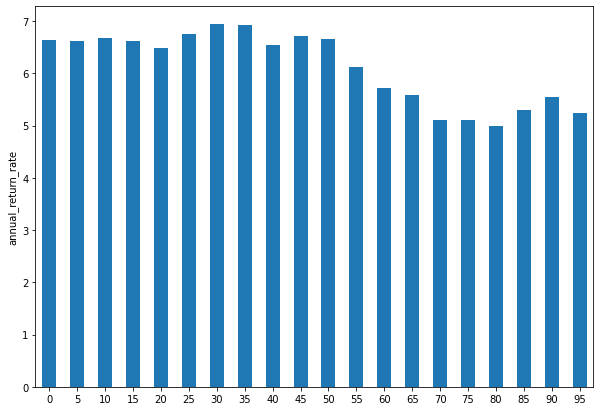

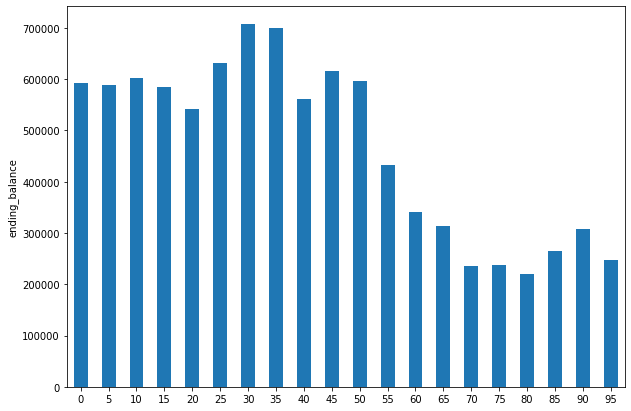

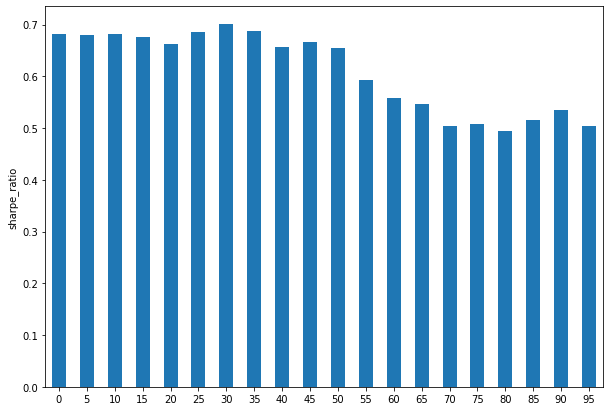

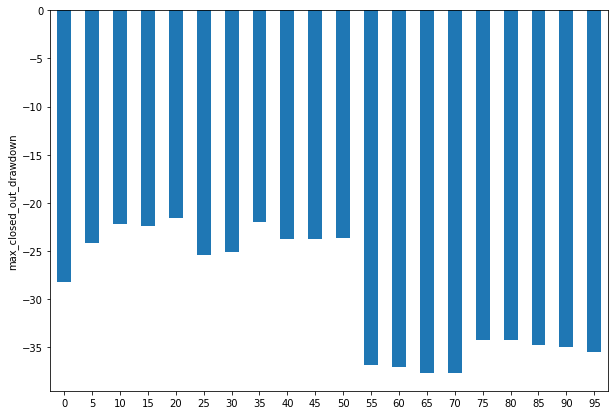

In [25]:
strategy.plot_bar_graph(df, 'annual_return_rate')
strategy.plot_bar_graph(df, 'ending_balance')
strategy.plot_bar_graph(df, 'sharpe_ratio')
strategy.plot_bar_graph(df, 'max_closed_out_drawdown')

Run Benchmark

In [26]:
s = strategies[bands[0]]
benchmark = pf.Benchmark(symbol, capital, s.start, s.end)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

1957-03-04 00:00:00 BUY  226 ^GSPC @ 44.06
2020-09-02 00:00:00 SELL 226 ^GSPC @ 3580.84


Equity curve

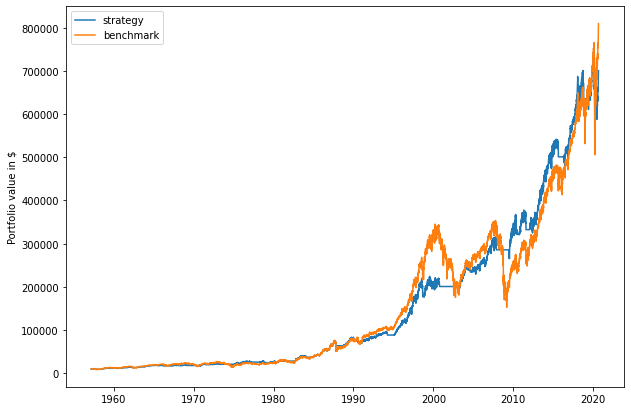

In [27]:
pf.plot_equity_curve(strategies['35'].dbal, benchmark=benchmark.dbal)